In [1]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.20/04


In [2]:
bb_mass  = np.load('blackbox_mass.npy')
bb_sigloss = np.load('blackbox_sigloss.npy')
bb_bkgloss = np.load('blackbox_bkgloss.npy')
qcd_mass = np.load('QCDMC_mass.npy')
qcd_sigloss = np.load('QCDMC_sigloss.npy')
qcd_bkgloss = np.load('QCDMC_bkgloss.npy')

In [9]:
from array import array

lFile = r.TFile("bkg.root","RECREATE") 
lTree = r.TTree("output","output")
mass  =  array('f', [ 1.5 ])
loss1 =  array('f', [ 1.5 ])
loss2 =  array('f', [ 1.5 ])
lTree.Branch('mass',   mass, 'mass/F')
lTree.Branch('loss1', loss1, 'loss1/F')
lTree.Branch('loss2', loss2, 'loss2/F')

for i0 in range(len(qcd_mass)):
    mass [0]=qcd_mass[i0]
    loss1[0]=qcd_sigloss[i0]
    loss2[0]=qcd_bkgloss[i0]
    lTree.Fill()

lTree.Write()
lFile.Close()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: A


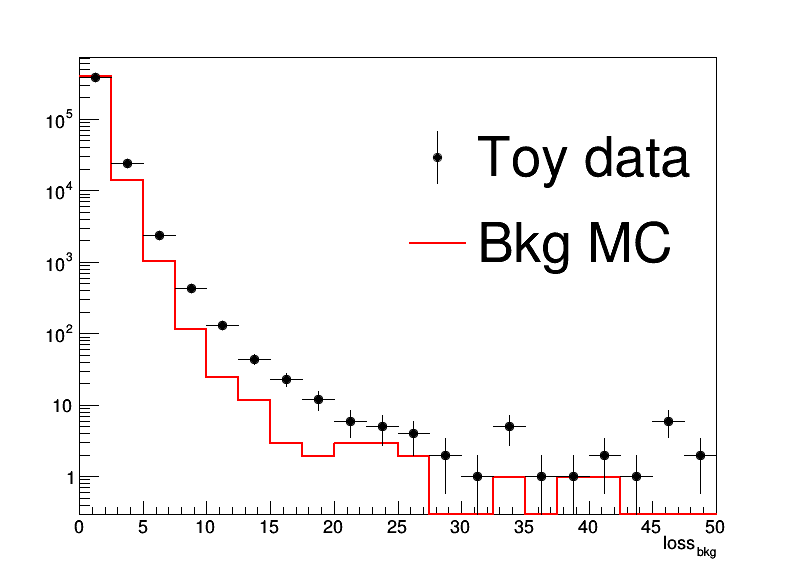

In [21]:
lBBFile = r.TFile("bb.root")
lBBTree = lBBFile.Get("output")
#lBBTree.SetDirectory(0)
#lBBFile.Close()

lBkgFile = r.TFile("bkg.root")
lBkgTree = lBkgFile.Get("output")
#lBkgTree.SetDirectory(0)
#lBkgFile.Close()

lH0 = r.TH1F("bbhist","bbhist",20,0,50)
lH1 = r.TH1F("bkhist","bkhist",20,0,50) 
lH0.SetMarkerColor(r.kBlack)
lH0.SetMarkerStyle(r.kFullCircle)
lH0.SetLineColor(r.kBlack)

lH1.SetMarkerColor(r.kRed)
lH1.SetLineColor(r.kRed)
lH1.SetLineWidth(2)

cut="loss2 > 0.0"

lBBTree .Draw("loss2>>bbhist",cut)
lBkgTree.Draw("loss2>>bkhist",cut)
lH1.Scale(lH0.Integral()/lH1.Integral())

lC0 = r.TCanvas("A","A",800,600)
lH0.SetTitle("")
lH0.GetXaxis().SetTitle("loss_{bkg}")
lLegend = r.TLegend(0.5,0.5,0.9,0.8)
lLegend.SetFillColor(0)
lLegend.SetBorderSize(0)
lLegend.AddEntry(lH0,"Toy data","ep")
lLegend.AddEntry(lH1,"Bkg MC","l")
r.gStyle.SetOptStat(0)
lC0.SetLogy()
lH0.Draw("ep")
lH1.Draw("hist sames")
lH0.Draw("ep sames")
lLegend.Draw()
lC0.Draw()

Warning in <TFile::Append>: Replacing existing TH1: bbhist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkhist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: A


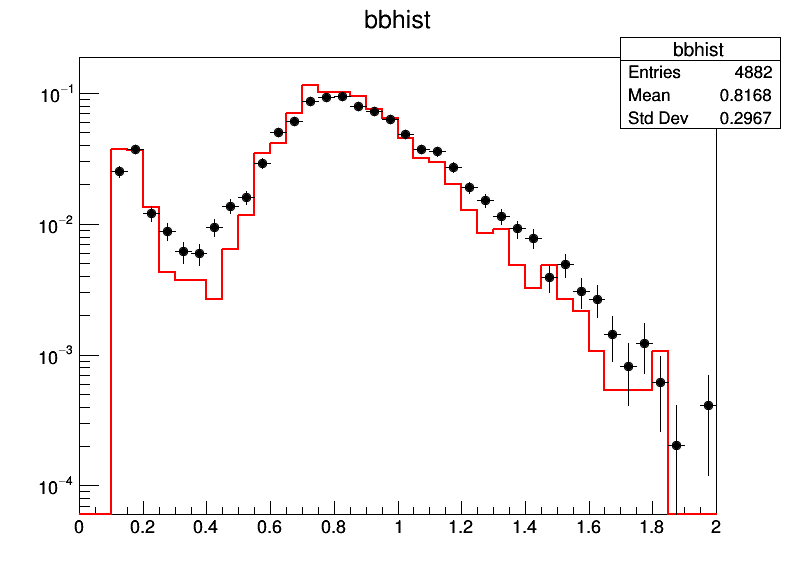

In [25]:
lH0 = r.TH1F("bbhist","bbhist",40,0,2)
lH1 = r.TH1F("bkhist","bkhist",40,0,2) 
lH0.SetMarkerColor(r.kBlack)
lH0.SetMarkerStyle(r.kFullCircle)
lH0.SetLineColor(r.kBlack)

lH1.SetMarkerColor(r.kRed)
lH1.SetLineColor(r.kRed)
lH1.SetLineWidth(2)

cut="mass > 3400 && mass > 3200 && loss1 < 100 && loss2 > 4.0"

lBBTree .Draw("loss2/loss1>>bbhist",cut)
lBkgTree.Draw("1.0*loss2/loss1>>bkhist",cut)
lH0.Scale(1./lH0.Integral())
lH1.Scale(1./lH1.Integral())

lC0 = r.TCanvas("A","A",800,600)
lC0.SetLogy()
lH0.Draw("ep")
lH1.Draw("hist sames")
lH0.Draw("ep sames")
lC0.Draw()

Warning in <TFile::Append>: Replacing existing TH1: bbhist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkhist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: A


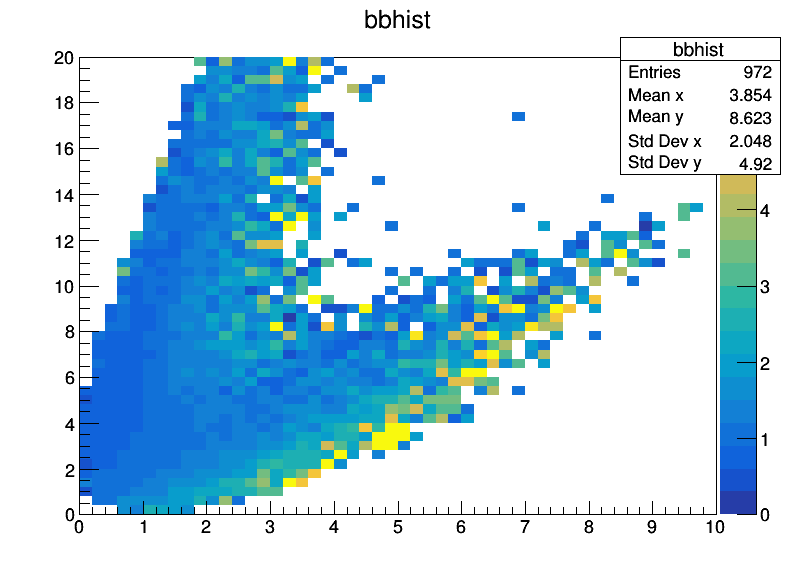

In [13]:
lH0 = r.TH2F("bbhist","bbhist",50,0,10,50,0,20)
lH1 = r.TH2F("bkhist","bkhist",50,0,10,50,0,20) 

cut="mass > 3000 && mass < 6300"

lBBTree .Draw("loss1:loss2>>bbhist",cut)
lBkgTree.Draw("loss1:loss2>>bkhist",cut)
lH0.Scale(1./lH0.Integral())
lH1.Scale(1./lH1.Integral())

lH0.Divide(lH1)
lH0.GetZaxis().SetRangeUser(0,6)

lC0 = r.TCanvas("A","A",800,600)
#lC0.SetLogy()
lH0.Draw("colz")
#lH1.Draw("hist sames")
#lH0.Draw("ep sames")
lC0.Draw()


Warning in <TFile::Append>: Replacing existing TH1: bbhist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkhist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: A


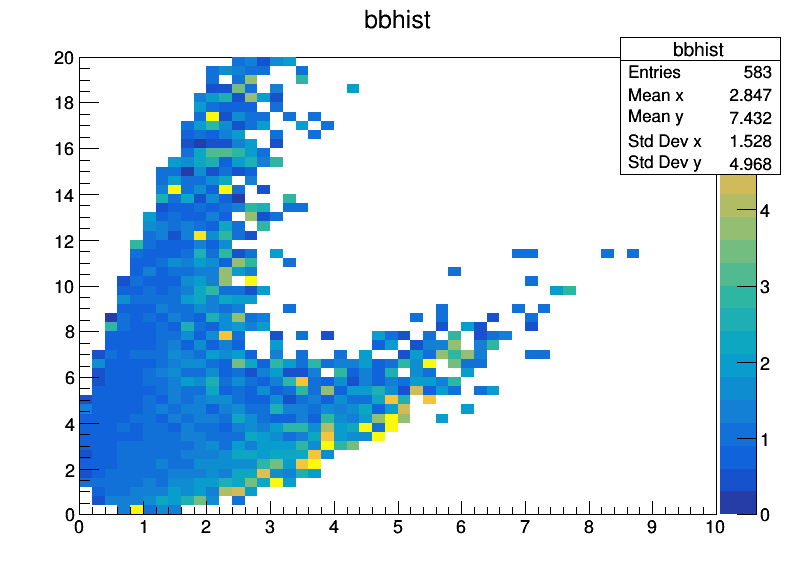

In [14]:
lH0 = r.TH2F("bbhist","bbhist",50,0,10,50,0,20)
lH1 = r.TH2F("bkhist","bkhist",50,0,10,50,0,20) 

cut="mass > 3700 && mass < 4000"

lBBTree .Draw("loss1:loss2>>bbhist",cut)
lBkgTree.Draw("loss1:loss2>>bkhist",cut)
lH0.Scale(1./lH0.Integral())
lH1.Scale(1./lH1.Integral())

lH0.Divide(lH1)
lH0.GetZaxis().SetRangeUser(0,6)

lC0 = r.TCanvas("A","A",800,600)
#lC0.SetLogy()
lH0.Draw("colz")
#lH1.Draw("hist sames")
#lH0.Draw("ep sames")
lC0.Draw()


496.0


Warning in <TFile::Append>: Replacing existing TH1: bbhist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkhist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: A


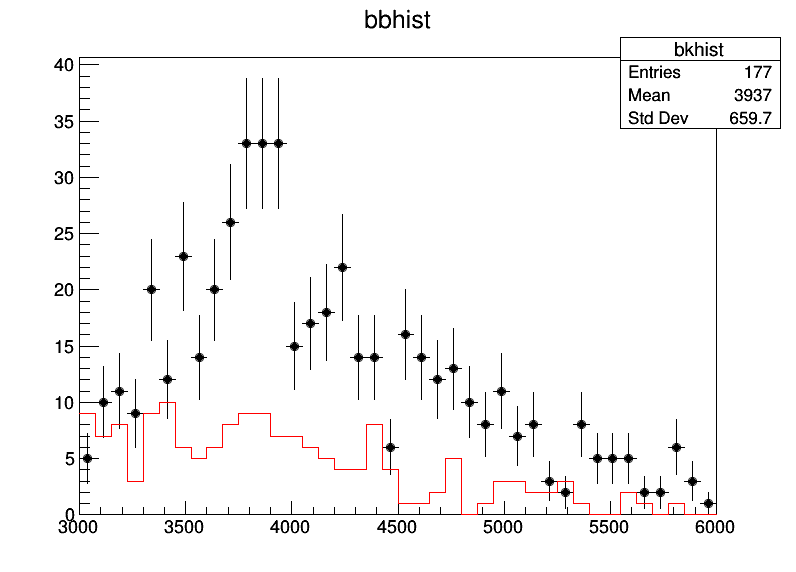

In [33]:
lH0 = r.TH1F("bbhist","bbhist",40,3000,6000)
lH1 = r.TH1F("bkhist","bkhist",40,3000,6000) 
lH0.SetMarkerColor(r.kBlack)
lH0.SetMarkerStyle(r.kFullCircle)
lH0.SetLineColor(r.kBlack)

lH1.SetMarkerColor(r.kRed)
lH1.SetLineColor(r.kRed)

cut ="loss2/loss1 > -1.0 && loss2 > 5.8 && loss1 < 8"
#cut1="loss2/loss1 > -0.9 && loss2 > 5.0 && loss1 < 10"

lBBTree .Draw("mass>>bbhist",cut)
lBkgTree.Draw("mass>>bkhist",cut)
#lH0.Scale(1./lH0.Integral())
#lH1.Scale(1./lH1.Integral())
#lH0.Divide(lH1)
print(lH0.Integral())

lC0 = r.TCanvas("A","A",800,600)
lH0.Draw("ep")
lH1.Draw("hist sames")
#lH0.Draw("ep sames")
lC0.Draw()

In [38]:
fHists=[]
def drawFrame(iX,iData,iBkg,iFuncs,iCat):
    lCan   = r.TCanvas("qcd_"+iCat,"qcd_"+iCat,800,600)
    leg = r.TLegend(0.55,0.63,0.86,0.87)
    lFrame = iX.frame()
    lFrame.SetTitle("")
    lFrame.GetXaxis().SetTitle("m_{jj} (GeV)")
    lFrame.GetYaxis().SetTitle("Events")
    iBkg.plotOn(lFrame,r.RooFit.FillColor(r.TColor.GetColor(100, 192, 232)),r.RooFit.FillStyle(3008), r.RooFit.DrawOption("E3"), r.RooFit.LineColor(r.kBlue))
    iData.plotOn(lFrame)
    iColor=51
    lRange = len(iFuncs)
    for i0 in range(lRange):
        if i0 == 2:
            iFuncs[i0].plotOn(lFrame,r.RooFit.LineColor(r.kGreen+1))
        else:
            iFuncs[i0].plotOn(lFrame,r.RooFit.LineColor(iColor),r.RooFit.LineStyle(r.kDashed))
        iColor+=10
    leg.SetFillColor(0)
    lFrame.Draw()
    lTmpData  = r.TH1F("tmpData" ,"tmpData" ,1,0,10); lTmpData .SetMarkerStyle(r.kFullCircle);
    lTmpBkg   = r.TH1F("tmpBkg"  ,"tmpBkg"  ,1,0,10); lTmpBkg  .SetFillStyle(3008); lTmpBkg.SetLineColor(r.kBlue); lTmpBkg.SetFillColor(r.TColor.GetColor(100, 192, 232));
    lTmpFunc1 = r.TH1F("tmpFunc1","tmpFunc1",1,0,10); lTmpFunc1.SetLineColor(51);                lTmpFunc1.SetLineWidth(2); lTmpFunc1.SetLineStyle(r.kDashed);
    lTmpFunc2 = r.TH1F("tmpFunc2","tmpFunc2",1,0,10); lTmpFunc2.SetLineColor(61);                lTmpFunc2.SetLineWidth(2); lTmpFunc2.SetLineStyle(r.kDashed);
    lTmpFunc3 = r.TH1F("tmpFunc3","tmpFunc3",1,0,10); lTmpFunc3.SetLineColor(r.kGreen+1);        lTmpFunc3.SetLineWidth(2); #lTmpFunc3.SetLineStyle(r.kDashed);                              
    leg.AddEntry(lTmpData,"data","lpe")
    leg.AddEntry(lTmpBkg ,"loss-sideband data","f")
    leg.AddEntry(lTmpFunc2,"bkg","lp")
    leg.AddEntry(lTmpFunc3,"sig+bkg","lp")
    leg.AddEntry(lTmpFunc1,"loss-sideband","lp")
    leg.Draw()
    lCan.Modified()
    lCan.Update()
    lCan.SaveAs(lCan.GetName()+".png")

# build workspace                                                                                                                                                                            
def workspace(iOutput,iDatas,iFuncs,iCat="cat0"):
    print('--- workspace')
    lW = r.RooWorkspace("w_"+str(iCat))
    for pData in iDatas:
        print('adding data ',pData,pData.GetName())
        getattr(lW,'import')(pData,r.RooFit.RecycleConflictNodes())
    for pFunc in iFuncs:
        print('adding func ',pFunc,pFunc.GetName())
        getattr(lW,'import')(pFunc,r.RooFit.RecycleConflictNodes())
    if iCat.find("pass_cat0") == -1:
        lW.writeToFile(iOutput,False)
    else:
        lW.writeToFile(iOutput)
    return lW

def clip(iData,iMin,iMax):
    pMinBin = 0
    pMaxBin = iData.GetNbinsX()
    for i0 in range(iData.GetNbinsX()+1):
        pLVal = iData.GetBinLowEdge(i0)
        pHVal = iData.GetBinLowEdge(i0)
        if iMin > pLVal:
            pMinBin = i0
        if iMax > pHVal:
            pMaxBin = i0
    NBins = pMaxBin-pMinBin
    pMinLow = iData.GetBinLowEdge(pMinBin)
    pMinMax = iData.GetBinLowEdge(pMaxBin)
    pData = r.TH1F(iData.GetName()+"R",iData.GetName()+"R",NBins,pMinLow,pMinMax)
    for i0 in range(NBins):
        print(iData.GetBinLowEdge(i0+pMinBin),pData.GetBinLowEdge(i0+1),"! Done")
        pData.SetBinContent(i0+1,iData.GetBinContent(i0+pMinBin))
    fHists.append(pData)
    return pData


In [ ]:
def fitFunc(iData,iBkg,iCat,iMin=3000,iMax=6000,iStep=10,iFixToSB=False):
    pData = clip(iData,2500,7000)
    pBkg  = clip(iBkg ,2500,7000)
    #pBkg  = iBkg#clip(iBkg ,3000,6200)                                                                                                                                                      
    lXMin=pData.GetXaxis().GetXmin()
    lXMax=pData.GetXaxis().GetXmax()
    lNBins=pData.GetNbinsX()
    lX = r.RooRealVar("x","x",lXMin,lXMax)
    lX.setBins(lNBins)
    lNTot   = r.RooRealVar("qcdnorm_"+iCat,"qcdnorm_"+iCat,pData.Integral(),0,3*pData.Integral())
    #lA0     = r.RooRealVar   ("a0"+"_"+iCat,"a0"+"_"+iCat,0.00,-1.,1.)                                                                                                                      
    #lA1     = r.RooRealVar   ("a1"+"_"+iCat,"a1"+"_"+iCat,0.01,-1,1.)                                                                                                                       
    #lA2     = r.RooRealVar   ("a2"+"_"+iCat,"a2"+"_"+iCat,0.01,-1,1)                                                                                                                        
    #lA3     = r.RooRealVar   ("a3"+"_"+iCat,"a3"+"_"+iCat,0.01,-1,1)                                                                                                                        
    #lA4     = r.RooRealVar   ("a4"+"_"+iCat,"a4"+"_"+iCat,0.01,-1,1)                                                                                                                        
    #lA5     = r.RooRealVar   ("a5"+"_"+iCat,"a5"+"_"+iCat,0.01,-1,1)                                                                                                                        
    #lQFuncP = r.RooBernstein("tqcd_pass_"+iCat,"tqcd_pass_"+iCat,lX,r.RooArgList(lA0,lA1,lA2,lA3))#,lA5))                                                                                   

    lA0      = r.RooRealVar   ("a0"+"_"+iCat,"a0"+"_"+iCat,1.0,-200.,200.); lA0.setConstant(r.kTRUE)
    lA1      = r.RooRealVar   ("a1"+"_"+iCat,"a1"+"_"+iCat,1.00,-200.,200.)
    lA2      = r.RooRealVar   ("a2"+"_"+iCat,"a2"+"_"+iCat,3.00,-200.,200.)
    lQFuncP  = r.RooGenericPdf("tqcd_pass_"+iCat,"tqcd_pass_"+iCat,"(1-@0/13000.)**@2*(@1/13000.)**-@2",r.RooArgList(lX,lA1,lA2))#,lA5))                                                     
    lQCDP   = r.RooExtendPdf("qcd_"+iCat, "qcd"+iCat,lQFuncP,lNTot)

    lBNTot   = r.RooRealVar("bqcdnorm_"+iCat,"bqcdnorm_"+iCat,pData.Integral(),0,3*pData.Integral())
    lBA0      = r.RooRealVar   ("ba0"+"_"+iCat,"ba0"+"_"+iCat,0.00,-200.,200.)
    lBA1      = r.RooRealVar   ("ba1"+"_"+iCat,"ba1"+"_"+iCat,0.00,-200.,200.)
    lBA2      = r.RooRealVar   ("ba2"+"_"+iCat,"ba2"+"_"+iCat,0.00,-200.,200.)
    #lBA0     = r.RooRealVar   ("a0"+"_"+iCat,"a0"+"_"+iCat,0.00,-1.,1.)                                                                                                                     
    #lBA1     = r.RooRealVar   ("a1"+"_"+iCat,"a1"+"_"+iCat,0.01,-1,1.)                                                                                                                      
    #lBA2     = r.RooRealVar   ("a2"+"_"+iCat,"a2"+"_"+iCat,0.01,-1,1)                                                                                                                       
    lBQFuncP  = r.RooGenericPdf("btqcd_pass_"+iCat,"btqcd_pass_"+iCat,"(1-@0/13000.)**@1*(@0/13000.)**-@2",r.RooArgList(lX,lBA1,lBA2))
    lBQCDP    = r.RooExtendPdf ("bqcd_"+iCat, "bqcd"+iCat,lBQFuncP,lBNTot)

    lMass   = r.RooRealVar("mass","mass"  ,5000,3000,7000); #lMass.setConstant(r.kTRUE)                                                                                                      
    lSigma  = r.RooRealVar("sigma","Width of Gaussian",80,10,500); lSigma.setConstant(r.kTRUE)

    lGaus   = r.RooGaussian("gauss","gauss(x,mean,sigma)",lX,lMass,lSigma)
    lNSig   = r.RooRealVar("signorm_"+iCat,"signorm_"+iCat,0.1*pData.Integral(),0,0.3*pData.Integral())
    lSig    = r.RooExtendPdf("sig_"+iCat, "sig_"+iCat,lGaus,lNSig)
    lTot    = r.RooAddPdf("model", "model", r.RooArgList(lSig, lQCDP))
    lHData  = r.RooDataHist("data_obs","data_obs", r.RooArgList(lX),pData)
    lHBkg   = r.RooDataHist("bkgestimate","bkgestimate", r.RooArgList(lX),pBkg)

    lBQCDP.fitTo(lHBkg)
    lQCDP.fitTo(lHBkg);
    if iFixToSB:
        lA1.setConstant(r.kTRUE); lA2.setConstant(r.kTRUE);
    lTot.fitTo(lHData)#,r.RooFit.Extended(r.kTRUE))                                                                                                                                          
    drawFrame(lX,lHData,lHBkg,[lBQCDP,lQCDP,lTot],iCat)

    lW = workspace(fOutput,[lHData],[lTot,lQCDP],iCat)
    lW.defineSet("poi","signorm_"+iCat)
    bmodel = r.RooStats.ModelConfig("b_model",lW)
    bmodel.SetPdf(lW.pdf("model"))
    bmodel.SetNuisanceParameters(r.RooArgSet(lA1,lA2,lNTot))
    bmodel.SetObservables(r.RooArgSet(lX))
    bmodel.SetParametersOfInterest(lW.set("poi"))
    lW.var("signorm_"+iCat).setVal(0)
    bmodel.SetSnapshot(lW.set("poi"))

    sbmodel = r.RooStats.ModelConfig("s_model",lW)
    sbmodel.SetPdf(lW.pdf("model"))
    sbmodel.SetNuisanceParameters(r.RooArgSet(lA1,lA2,lNTot))
    sbmodel.SetObservables(r.RooArgSet(lX))
    sbmodel.SetParametersOfInterest(lW.set("poi"))
    lW.var("signorm_"+iCat).setVal(lNSig.getVal())
    sbmodel.SetSnapshot(lW.set("poi"))

    masses =  array( 'd' )
    pvalues = array( 'd' )
    stepsize = (iMax-iMin)/iStep
    masslist = [iMin + i*stepsize for i in range(iStep+1)]
    for mass in masslist:
        lW.var("mass").setVal(mass)
        ac = r.RooStats.AsymptoticCalculator(lHData, sbmodel, bmodel)
        ac.SetOneSidedDiscovery(True)
        ac.SetPrintLevel(-1)
        asResult = ac.GetHypoTest()
        pvalue=asResult.NullPValue()
        if pvalue > 1e-8:
            masses.append(mass)
            pvalues.append(pvalue)
            print(mass,pvalue)
    return masses,pvalues


In [ ]:
lH0 = r.TH1F("bbhist","bbhist",40,3000,6000)
lH1 = r.TH1F("bkhist","bkhist",40,3000,6000) 
lH0.SetMarkerColor(r.kBlack)
lH0.SetMarkerStyle(r.kFullCircle)
lH0.SetLineColor(r.kBlack)

lH1.SetMarkerColor(r.kRed)
lH1.SetLineColor(r.kRed)

cut ="loss2/loss1 > -1.0 && loss2 > 5.8 && loss1 < 8"
#cut1="loss2/loss1 > -0.9 && loss2 > 5.0 && loss1 < 10"

lBBTree .Draw("mass>>bbhist",cut)
lBkgTree.Draw("mass>>bkhist",cut)

fitFunc(lH0,lH1,"1",iMin=3000,iMax=6000,iStep=150,iFixToSB=False)